#  ASSIGNMENT-3 (CURVE FITTING)

- In this assignment , we are given three text files that has the experimental data within it.
- We are going to fit the [Planck's formula](https://en.wikipedia.org/wiki/Planck_constant) curve with the experimental data.
- The formula is 

$$\text{Radiance}\;=\;\frac{\text{hc}^2}{\lambda^5} \frac{1}{(e^{\frac{hc}{k_{\text{B}}T}}-1)} $$

- Here **h** is Plancks constant and is equal to $6.626\times 10^{-34}$ and **c** is speed of light and is equal to $3\times 10^8$
and **k<sub>B</sub>** is Boltzmann constant and is equal to $1.381\times 10^{-23}$

- In this assignment , we are going to fit a cure with the equation same as Planck's formula by varying these constants i.e h,c,k<sub>B</sub> and predict the behaviour of the curve_fit() function available in scipy module


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [5]:
def read(filename:str)-> np.ndarray :#Function to read the file and extract data

    a=open(filename,"r")
    lst=a.readlines() #Reading the lines of the file
    x,y=[],[]
    for i in lst:
        _=i.split(",") #Splitting the data with the delmimiter ","
        x.append(float(_[0]))
        y.append(float(_[1]))
    return(x,y)

### Function to fit a curve for the datatset and return the parameters

In [8]:
def fit_curve(x:np.array,y:np.array,func,initial_guess:list) -> np.array :

    initial_guess=np.array(initial_guess)

    try:

        popt, pcov = curve_fit(func, x, y,p0=initial_guess) #Using curve_fit() function

    except RuntimeError as e:

        print("Try giving different initial conditions ")


    return(popt)
    

### Function with only T as parameter


In [9]:
def fn_T(_lambda:np.array,T:float) -> np.array: #Curve fit only with T
    c=3e8 #c value
    k=1.38e-23 #k_b value
    h=6.626e-34 #h value
    val=(h*c)
    val=val/(_lambda*k*T)

    val=np.array(val)

    return((2*h*(c**2))/((_lambda**5)*(np.exp(val)-1))) #Planck's formula

### Finding best initial guess for T parameter in the given range

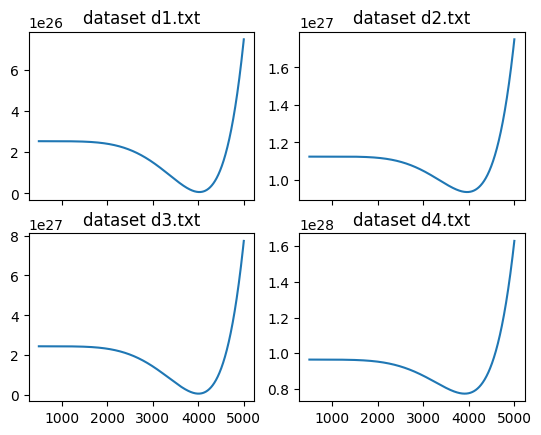

In [10]:
fig,ax=plt.subplots(2,2,sharex=True) #To have four plots adjacent to each other
def err_find(str:str)->np.ndarray : 
    x_val,y_val=read(str) #Getting the x and y values
    x_val=np.array(x_val)
    y_val=np.array(y_val)
    T_range=np.arange(500,5000,2,dtype=float) # To find the optimal temperature and give it as initial param.
    error=[] # Array to store all the errors
    for i in T_range:
        y_hat=(fn_T(x_val,i)) #The y value for the given temperature
        err=np.sum((y_val-y_hat)**2) #Finding the error
        error.append(err)
    return([T_range,error])
for i in range(2):
    for j in range(2):
        str=f"d{2*i+j+1}.txt"
        val=err_find(str)
        ax[i,j].plot(val[0],val[1]) #Plotting the error values
        tit=f"dataset d{2*i+j+1}.txt"
        ax[i,j].set_title(tit)
    

### Code to fit the curve for given datasets by only varying T parameter

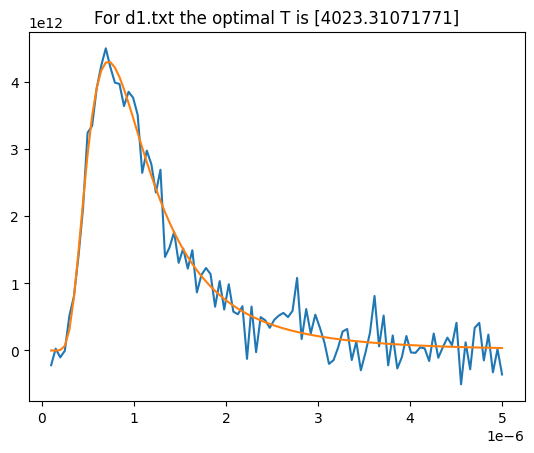

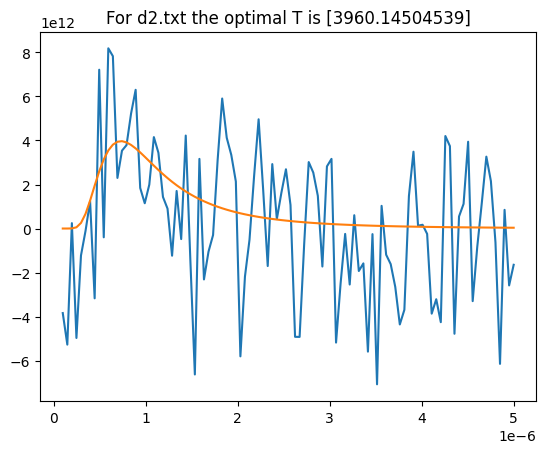

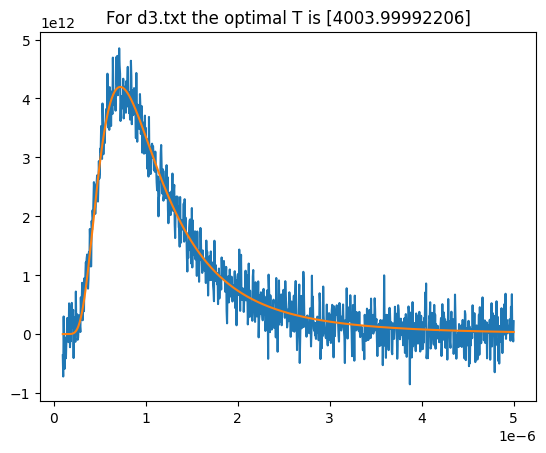

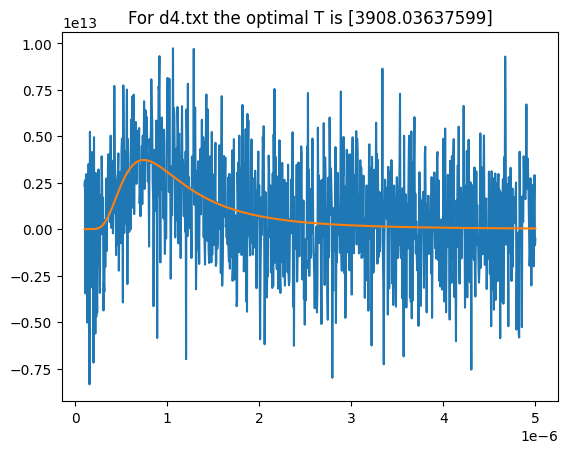

In [11]:
initial_guess=[1.8e3] #Initial guess
for i in range(4):
    name=f"d{i+1}.txt"
    x,y=read(name)
    x=np.array(x)
    y=np.array(y)
    param=fit_curve(x,y,fn_T,initial_guess) #Fitting the curve
    plt.plot(x,y) #Plotting the dataset
    plt.plot(x,fn_T(x,param[0])) #Plotting the fitted curve
    plt.title(f"For d{i+1}.txt the optimal T is {param}")
    plt.show()

### Function with only h as parameter


In [12]:
def fn_h(_lambda:np.array,h:float) -> np.array : #Function with only h param
    c=3e8 #c value
    k=1.38e-23 #k value
    T=4000 #T value
    val=(h*c)
    val=val/(_lambda*k*T)

    val=np.array(val)
    
    try:
        return((2*h*(c**2))/((_lambda**5)*(np.exp(val)-1))) #Planck's formula
    
    except RuntimeError or RuntimeWarning as e:
    
        return ([-1e10]) #Returning an array which is a placeholder to show RunTime error


### Finding best initial guess for h parameter in the given range
- Here as the values of h are very small , we will encounter overflow error.
- So we need to find the values where it does not encounter overflow error.

In [13]:
def opt_find(str:str) -> np.ndarray :
    x_val,y_val=read(str) #Getting x and y values
    x_val=np.array(x_val)
    y_val=np.array(y_val)
    h_range=np.arange(1e-36,1e-31,1e-36,dtype=float) # Range of h values for which we are finding the optimal initial guess
    corr_val=[] #Array to store the optimal values where overflow doesn't happen
    for i in h_range:
        if(fn_h(x_val,i)[0]!=-1e10): #The condition with the placeholder array
            corr_val.append(i)
    return(corr_val)

for i in range(4):
    str=f"d{i+1}.txt"
    v=opt_find(str)
    print("For the dataset ",str,f" the optimal values range from {np.min(v)} to {np.max(v)} \n") 

/tmp/ipykernel_3432/2965199455.py:11: RuntimeWarning: overflow encountered in exp
  return((2*h*(c**2))/((_lambda**5)*(np.exp(val)-1))) #Planck's formula


For the dataset  d1.txt  the optimal values range from 1e-36 to 9.9999e-32 

For the dataset  d2.txt  the optimal values range from 1e-36 to 9.9999e-32 

For the dataset  d3.txt  the optimal values range from 1e-36 to 9.9999e-32 

For the dataset  d4.txt  the optimal values range from 1e-36 to 9.9999e-32 



### Using the above result to find the minimum error

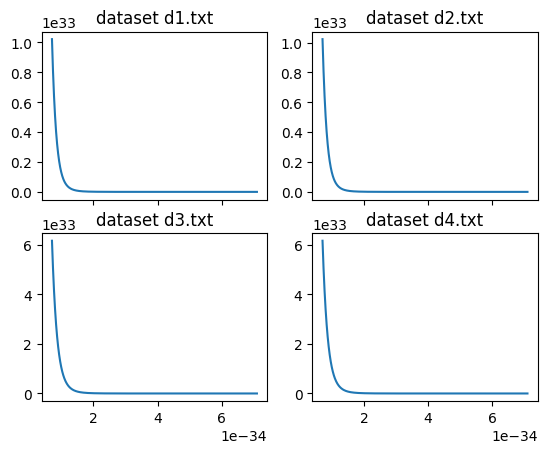

In [14]:
fig,ax=plt.subplots(2,2,sharex=True) #To have four plots to show the result
def err_find(str:str)-> np.ndarray:
    x_val,y_val=read(str) #To read the values from the file
    x_val=np.array(x_val)
    y_val=np.array(y_val)
    h_range=np.arange(7.1e-35,7.1e-34,0.8e-36,dtype=float) # Giving the valid h params as the range and finding minimum.
    error=[]
    for i in h_range:
        y_hat=(fn_h(x_val,i))
        err=np.sum((y_val-y_hat)**2) #Finding the error in the plot
        error.append(err)
    return([h_range,error]) 
for i in range(2):
    for j in range(2):
        str=f"d{2*i+j+1}.txt"
        val=err_find(str)
        ax[i,j].plot(val[0],val[1]) #Plotting the error
        tit=f"dataset d{2*i+j+1}.txt"
        ax[i,j].set_title(tit)

### Code to fit the curve for given datasets by only varying h parameter

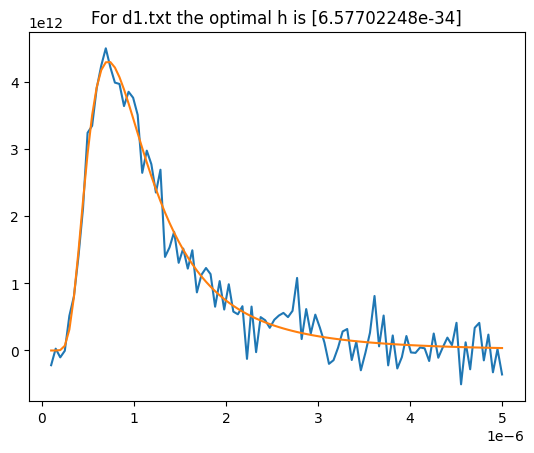

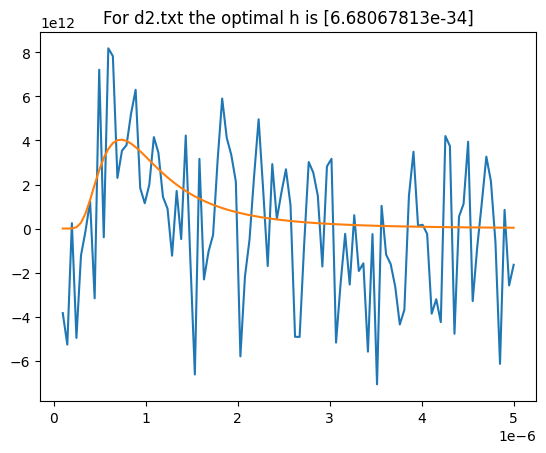

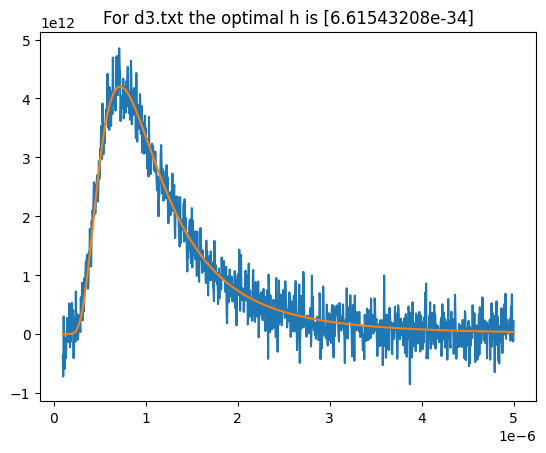

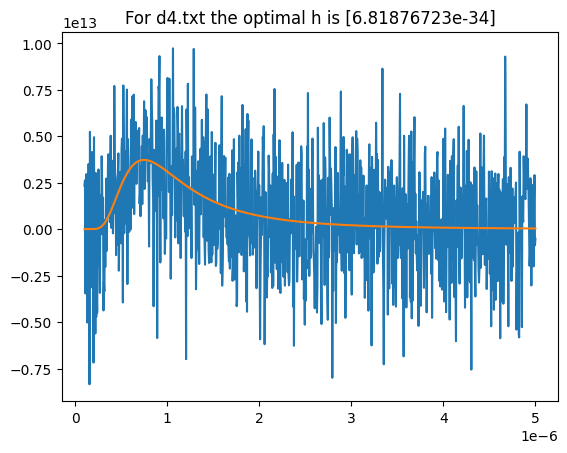

In [15]:
initial_guess=[6e-34] #Initial guess
for i in range(4):
    name=f"d{i+1}.txt"
    x,y=read(name)
    x=np.array(x)
    y=np.array(y)
    param=fit_curve(x,y,fn_h,initial_guess) #Fitting the curve
    plt.plot(x,y) #Plotting the curve
    plt.plot(x,fn_h(x,param[0]))
    plt.title(f"For d{i+1}.txt the optimal h is {param}")
    plt.show()

### Function with only c as parameter


In [16]:
def fn_c(_lambda:np.array,c:float) -> np.array:
    h=6.626e-34 #h value
    k=1.38e-23 #k value
    T=4000 #T value
    val=(h*c)
    val=val/(_lambda*k*T)

    val=np.array(val)

    try:
        return((2*h*(c**2))/((_lambda**5)*(np.exp(val)-1))) #Planck's formula
    
    except RuntimeError or RuntimeWarning as e:
        
        return ([-1e10]) #Returning an array which is a placeholder to show RunTime error

### Finding best initial guess for c parameter in the given range
- Here as the values of c are very large , we will encounter overflow error.
- So we need to find the values where it does not encounter overflow error.

In [17]:
def err_find(str:str)->np.array : 
    x_val,y_val=read(str) #To read the values from the file
    x_val=np.array(x_val)
    y_val=np.array(y_val)
    c_range=np.arange(1e7,1e9,1e6,dtype=float) # Range of c values for which we are finding the optimal initial guess
    corr_val=[] #Array to store the optimal values where overflow doesn't happen
    for i in c_range:
        if(fn_c(x_val,i)[0]!=-1e10): #The condition with the placeholder array
            corr_val.append(i)
    return(corr_val)
for i in range(4):
    str=f"d{i+1}.txt"
    v=err_find(str)
    print("For the dataset ",str,f" the optimal values range from {np.min(v)} to {np.max(v)} \n")

For the dataset  d1.txt  the optimal values range from 10000000.0 to 999000000.0 

For the dataset  d2.txt  the optimal values range from 10000000.0 to 999000000.0 

For the dataset  d3.txt  the optimal values range from 10000000.0 to 999000000.0 

For the dataset  d4.txt  the optimal values range from 10000000.0 to 999000000.0 



### Using the above result to find the minimum error

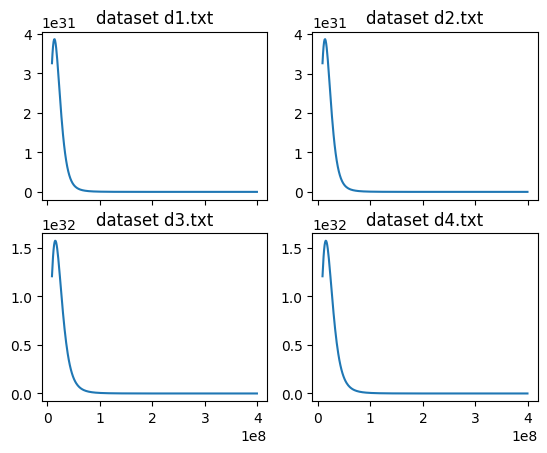

In [18]:
fig,ax=plt.subplots(2,2,sharex=True) #To have four plots to show the result
def err_find(str:str)-> np.ndarray :
    x_val,y_val=read(str) #To read the values from the file
    x_val=np.array(x_val)
    y_val=np.array(y_val)
    c_range=np.arange(0.9e7,4e8,1e6,dtype=float) # Giving the valid c params as the range and finding minimum.
    error=[]
    for i in c_range:
        y_hat=(fn_c(x_val,i))
        err=np.sum((y_val-y_hat)**2) #Finding the error in the plot
        error.append(err)
    return([c_range,error]) 
for i in range(2):
    for j in range(2):
        str=f"d{2*i+j+1}.txt"
        val=err_find(str)
        ax[i,j].plot(val[0],val[1]) #Plotting the error
        tit=f"dataset d{2*i+j+1}.txt"
        ax[i,j].set_title(tit)

### Code to fit the curve for given datasets by only varying c parameter

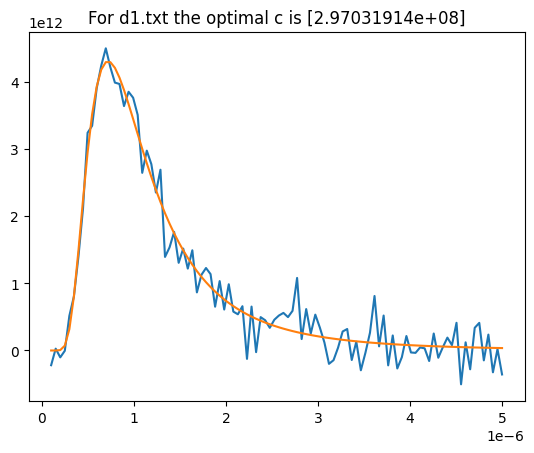

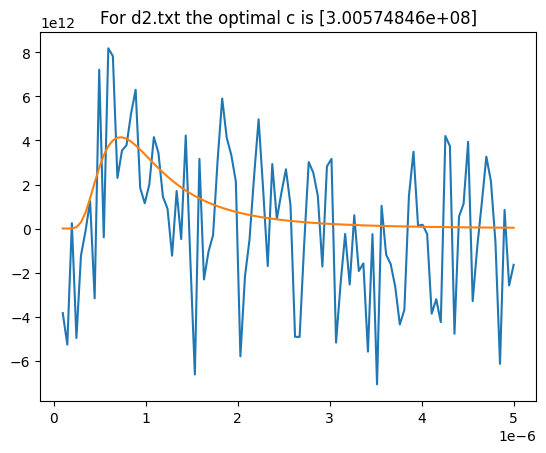

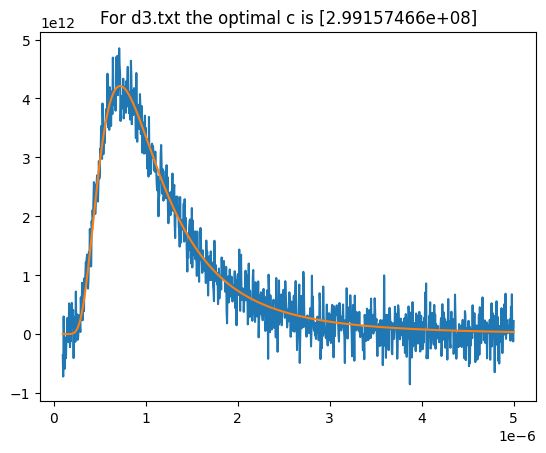

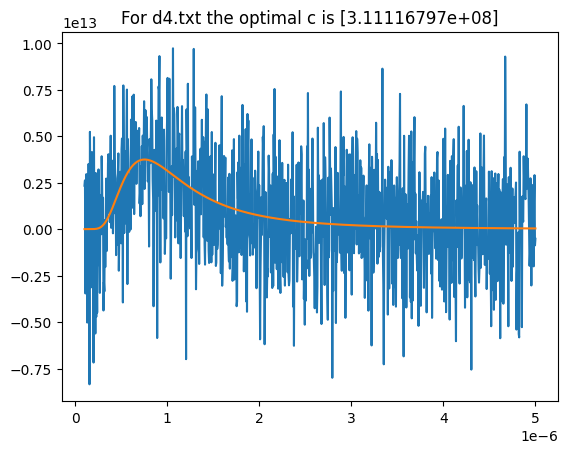

In [20]:
initial_guess=[1e8] #Initial guess
for i in range(4):
    name=f"d{i+1}.txt"
    x,y=read(name)
    x=np.array(x)
    y=np.array(y)
    param=fit_curve(x,y,fn_c,initial_guess) #Fitting the curve
    plt.plot(x,y)
    plt.plot(x,fn_c(x,param[0])) #Plotting the curve
    plt.title(f"For d{i+1}.txt the optimal c is {param}")
    plt.show()

### Function with only k as parameter


In [25]:
def fn_k(_lambda:np.array,k:float) -> np.array:
    h=6.626e-34 #h value
    c=3e8 #c value
    T=4000 #T value
    val=(h*c)
    val=val/(_lambda*k*T)

    val=np.array(val)

    try:
        return((2*h*(c**2))/((_lambda**5)*(np.exp(val)-1))) #Planck's formula
    
    except RuntimeError as e:
        
        return ([-1e10]) #Returning an array which is a placeholder to show RunTime error

### Finding best initial guess for k parameter in the given range
- Here as the values of h are very small , we will encounter overflow error.
- So we need to find the values where it does not encounter overflow error.

In [22]:
def opt_find(str:str)->np.array:
    x_val,y_val=read(str) #To read the values from the file
    x_val=np.array(x_val)
    y_val=np.array(y_val)
    k_range=np.arange(1e-24,1e-20,1e-25,dtype=float) # Range of c values for which we are finding the optimal initial guess
    corr_val=[] #Array to store the optimal values where overflow doesn't happen
    for i in k_range:
        if(fn_k(x_val,i)[0]!=-1e10): #The condition with the placeholder array
            corr_val.append(i)
    return(corr_val)
for i in range(4):
    str=f"d{i+1}.txt"
    v=opt_find(str)
    print("For the dataset ",str,f" the optimal values range from {np.min(v)} to {np.max(v)} \n")

For the dataset  d1.txt  the optimal values range from 1e-24 to 9.999900000000007e-21 

For the dataset  d2.txt  the optimal values range from 1e-24 to 9.999900000000007e-21 

For the dataset  d3.txt  the optimal values range from 1e-24 to 9.999900000000007e-21 

For the dataset  d4.txt  the optimal values range from 1e-24 to 9.999900000000007e-21 



### Using the above result to find the minimum error

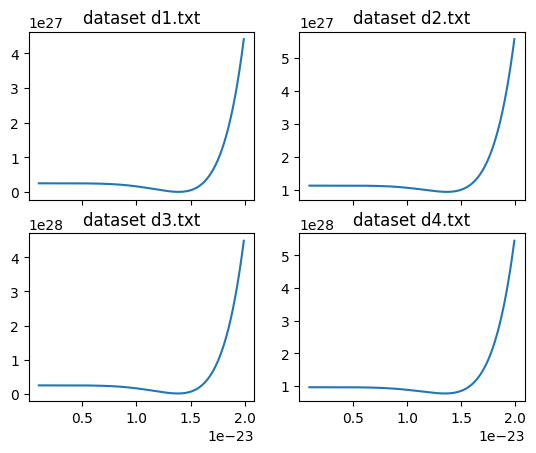

In [29]:
fig,ax=plt.subplots(2,2,sharex=True) #To have four plots to show the result
def err_find(str:str)->np.ndarray:
    x_val,y_val=read(str) #To read the values from the file
    x_val=np.array(x_val)
    y_val=np.array(y_val)
    k_range=np.arange(1e-24,0.2e-22,1e-25,dtype=float) # Giving the valid k params as the range and finding minimum.
    error=[]
    for i in k_range:
        y_hat=(fn_k(x_val,i))
        err=np.sum((y_val-y_hat)**2) #Finding the error in the plot
        error.append(err)
    return([k_range,error]) 
for i in range(2):
    for j in range(2):
        str=f"d{2*i+j+1}.txt"
        val=err_find(str)
        ax[i,j].plot(val[0],val[1]) #Plotting the error
        tit=f"dataset d{2*i+j+1}.txt"
        ax[i,j].set_title(tit)

### Code to fit the curve for given datasets by only varying k parameter

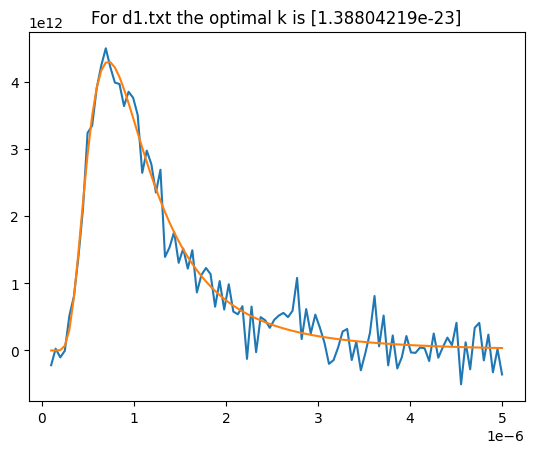

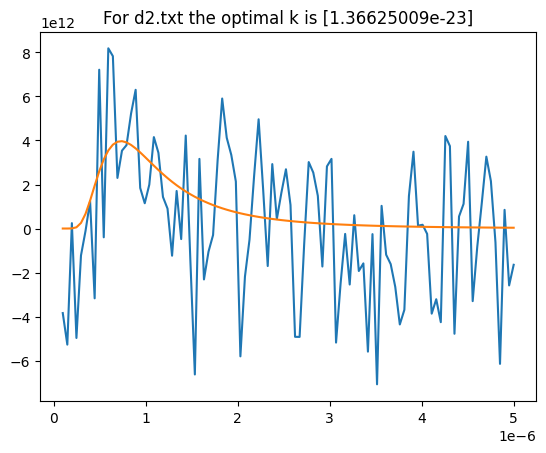

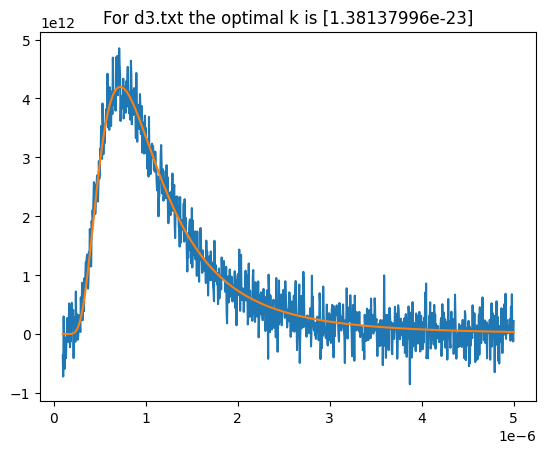

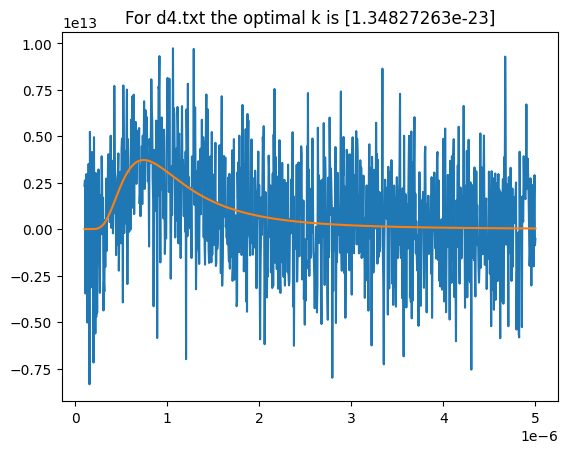

In [30]:
initial_guess=[1.5e-23] #Initial guess
for i in range(4):
    name=f"d{i+1}.txt"
    x,y=read(name)
    x=np.array(x)
    y=np.array(y)
    param=fit_curve(x,y,fn_k,initial_guess) #Fitting the curve
    plt.plot(x,y)
    plt.plot(x,fn_k(x,param[0])) #Plotting the curve
    plt.title(f"For d{i+1}.txt the optimal k is {param}")
    plt.show()

## Ambiguity in curve-fitting for 4 parmaeters
- When we are curve fitting , we cannot consider h , c, k<sub>B</sub> and T to be independent parameters as all of them appear in the formula in just two forms $\frac{hc}{k_B T}$ and $hc^2$.
- For example , while curve fitting the function $ f(x)\,=\,(a\times b)x $ , where a and b are parameters , we cannot consider a and b to be independent of each other as , in curve fitting (ab) varies as a single parameter.

## Fitting the curve with two parameters

In [31]:
def fn2(_lambda:np.array,a:float,b:float): #The function to return the Planck's formula value taking two parameters and input
     a=np.array(a)
     b=np.array(b)
     try:

          return((2*a)/((_lambda**5)*(np.exp((b/_lambda))-1))) #Planck's formula
     
     except RuntimeError or RuntimeWarning as e:

          print(_lambda)

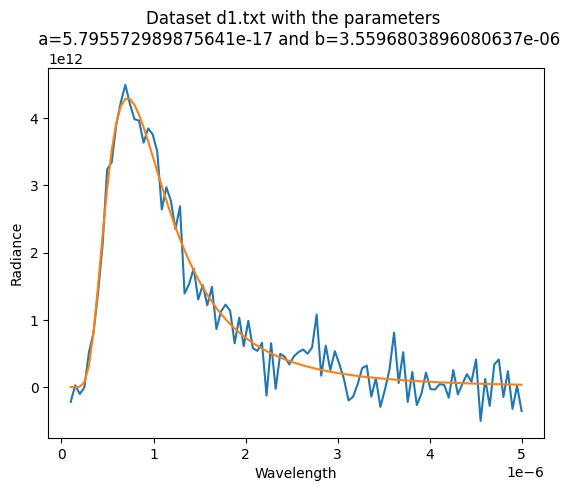

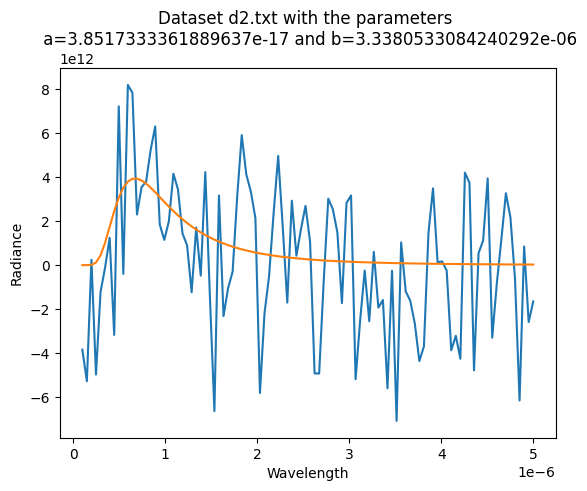

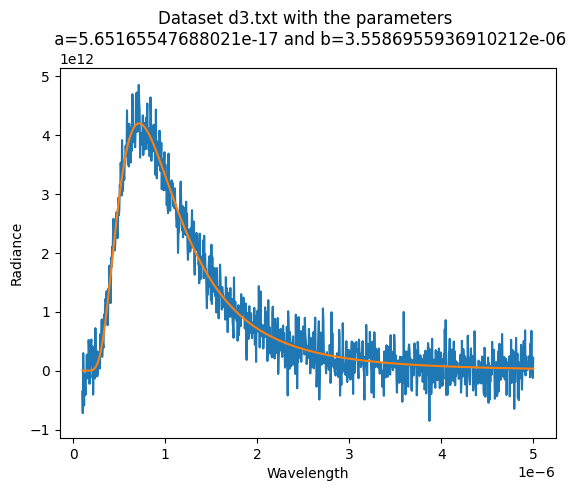

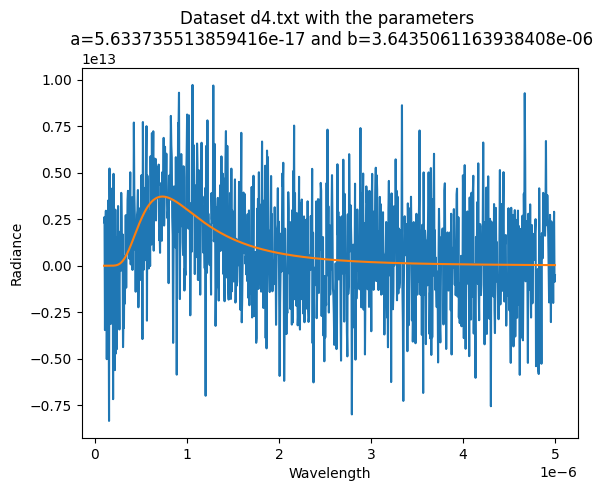

In [33]:
initial_guess=np.array([1e-17,1e-06]) #Initial guess
for i in range(4):
    name=f"d{i+1}.txt"
    x,y=read(name) #Reading the dataset
    x=np.array(x)
    y=np.array(y)
    param=fit_curve(x,y,fn2,initial_guess) #Fitting the curve with the dataset
    plt.plot(x,y)
    plt.xlabel("Wavelength")
    plt.ylabel("Radiance")
    plt.title(f"Dataset d{i+1}.txt with the parameters \n a={param[0]} and b={param[1]}")
    yb=fn2(x,param[0],param[1])
    plt.plot(x,yb) #Plotting the fitted curve
    plt.show()

### Function with four parameters

In [34]:
def fn4(_lambda:np.array,h:float,c:float,k:float,T:float): #The function to return the Planck's formula value taking four parameters and input

    val=(h*c)
    val=val/(_lambda*k*T)

    val=np.array(val)

    return((2*h*(c**2))/((_lambda**5)*(np.exp(val)-1))) #Planck's formula

### Plotting the original dataset and the cutve that is fit with the dataset

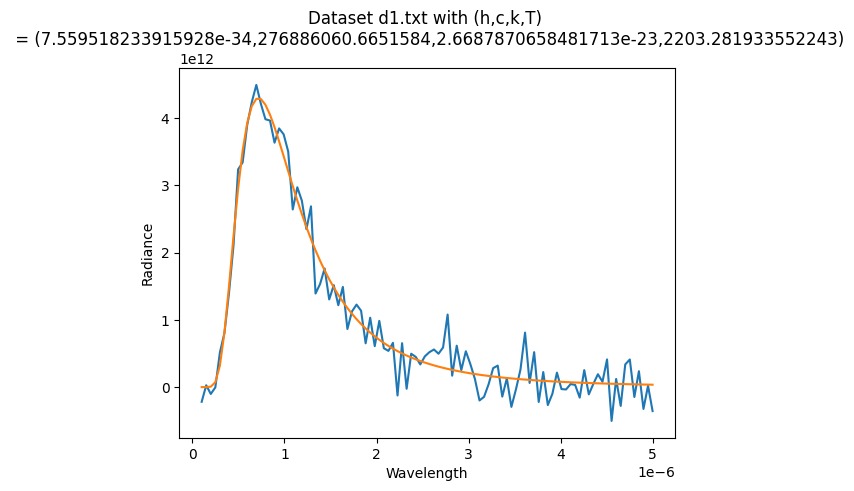

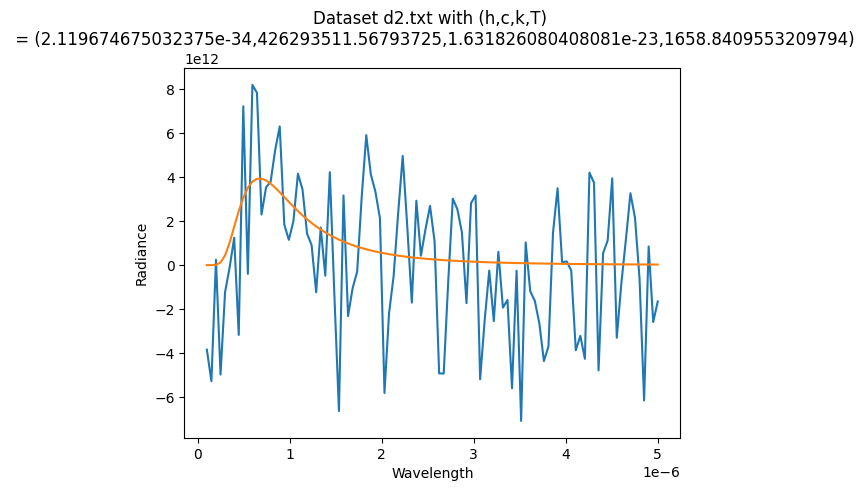

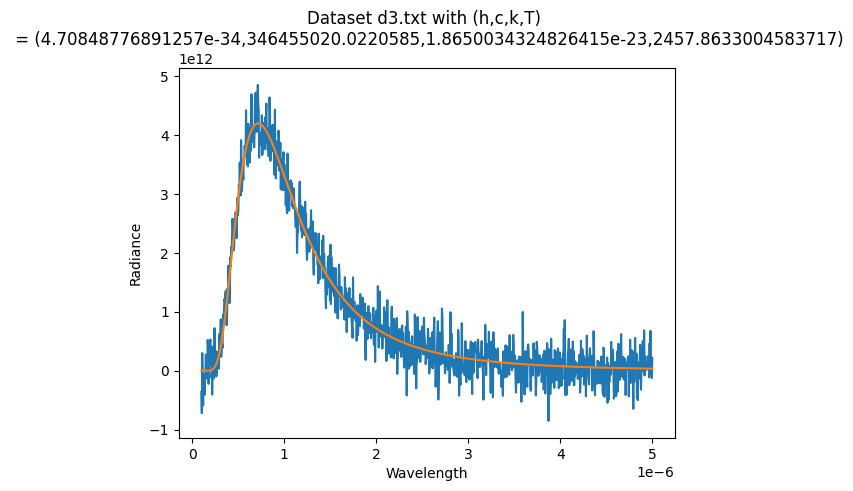

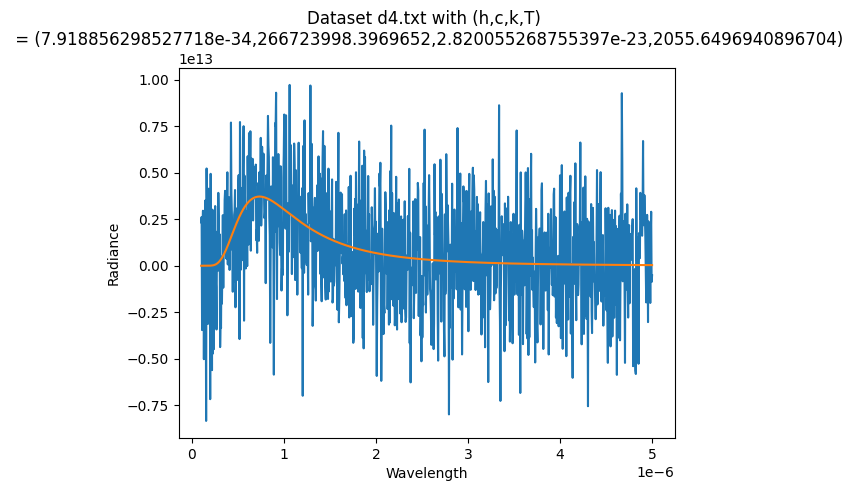

In [36]:
initial_guess=[1e-34,1e8,1e-23,1000] #Initial guess 
for i in range(4):
    name=f"d{i+1}.txt" 
    x,y=read(name) #Reading the dataset
    x=np.array(x)
    y=np.array(y)
    param=fit_curve(x,y,fn4,initial_guess) #Fitting the curve
    plt.plot(x,y) #Plotting dataset
    plt.xlabel("Wavelength")
    plt.ylabel("Radiance")
    [h,c,k,T]=param #Assigning the parameters the fitted curve's value
    plt.title(f"Dataset d{i+1}.txt with (h,c,k,T) \n = ({h},{c},{k},{T})")
    plt.plot(x,fn4(x,h,c,k,T))
    plt.show()
    

### Interconnection of two methods

In [37]:
initial_guess2=[1e-17,1e-6] #Initial guess for two parameters
str="d3.txt"
x,y=read(str)
x=np.array(x) # To get the values of x
y=np.array(y) # To get the values of y

h=np.arange(1e-34,1e-33,1e-35) #Giving initial values of h
k=np.arange(1e-23,1e-22,1e-24) #Giving initial values of k

param=fit_curve(x,y,fn2,initial_guess2) # Curve fitting for two parameters
err_a=[]
err_b=[]
for i in range(len(k)):
    c=np.sqrt((initial_guess2[0])/h[i])    #c value with sqrt(a/h)
    T=((h[i]*c)/(k[i]*initial_guess2[1]))  #T value with ((h*c)/(T*b))

    params=fit_curve(x,y,fn4,initial_guess=[h[i],c,k[i],T]) #Curve fitting for four parameters
    a=params[0]*(params[1]**2) #Finding a with h*c^2
    b=((params[0]*params[1])/(params[2]*params[3])) #Finding b with (h*c)/(k*T)
    err_a.append(np.abs(a-param[0])/param[0]) #Finding error percentage for a
    err_b.append(np.abs(b-param[1])/param[1]) #Finding error percentage for b

print(f"The largest percentage error of a is {np.max(err_a)*100}") 
print(f"The largest percentage error of b is {np.max(err_b)*100}")




/tmp/ipykernel_3432/2279635596.py:8: RuntimeWarning: overflow encountered in exp
  return((2*h*(c**2))/((_lambda**5)*(np.exp(val)-1))) #Planck's formula


The largest percentage error of a is 0.0006043507575537266
The largest percentage error of b is 0.00035718788256344737
